## 2. Data Understanding and Exploratory Data Analysis (EDA)

A thorough understanding of the dataset is a prerequisite for effective modeling. This section details the process of loading, inspecting, and visualizing the "Students Performance in Exams" dataset to uncover initial patterns, anomalies, and relationships.

### 2.1 Dataset Loading and Initial Inspection

The dataset was loaded into a pandas DataFrame. Initial inspection reveals a clean and well-structured dataset with 1,000 observations and 8 features. There are no missing values, which simplifies the initial data cleaning phase.

In [2]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset from the specified path
file_path = 'StudentsPerformance.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


The `info()` method provides a summary of the DataFrame, including data types and non-null counts. All columns are fully populated.

In [3]:
# Display a concise summary of the dataframe, including data types and non-null counts
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Descriptive statistics for the numerical columns reveal that the mean scores are centered in the high 60s, with standard deviations of approximately 15 points. The minimum and maximum scores show a wide range of student performance.

In [4]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())


Descriptive Statistics for Numerical Features:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### 2.2 Univariate Analysis

#### 2.2.1 Distribution of Numerical Features (Exam Scores)

Histograms and Kernel Density Estimate (KDE) plots are used to visualize the distribution of the three exam scores. All three scores exhibit distributions that are approximately normal, or Gaussian, which is a favorable characteristic for many linear models that assume normally distributed residuals.

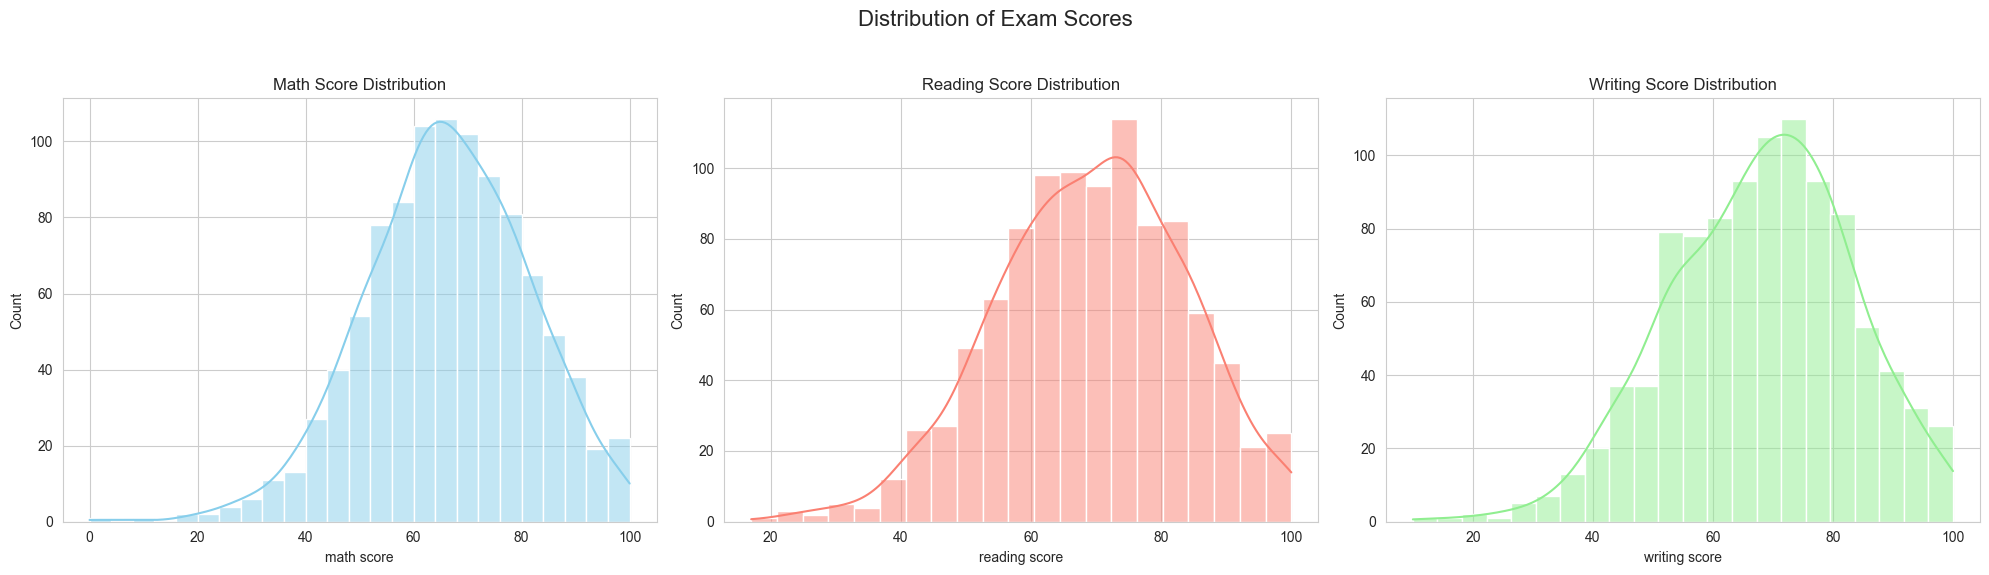

In [5]:
# Plot distributions of the numerical scores
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Distribution of Exam Scores', fontsize=16)

# Plot for math score
sns.histplot(df['math score'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Distribution')

# Plot for reading score
sns.histplot(df['reading score'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Reading Score Distribution')

# Plot for writing score
sns.histplot(df['writing score'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Writing Score Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 2.2.2 Distribution of Categorical Features

Bar plots are used to visualize the frequencies of categories within the dataset's object-type features.

C:\Users\nguye\AppData\Local\Temp\ipykernel_11408\4110261723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
C:\Users\nguye\AppData\Local\Temp\ipykernel_11408\4110261723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
C:\Users\nguye\AppData\Local\Temp\ipykernel_11408\4110261723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], order=df[col].value_

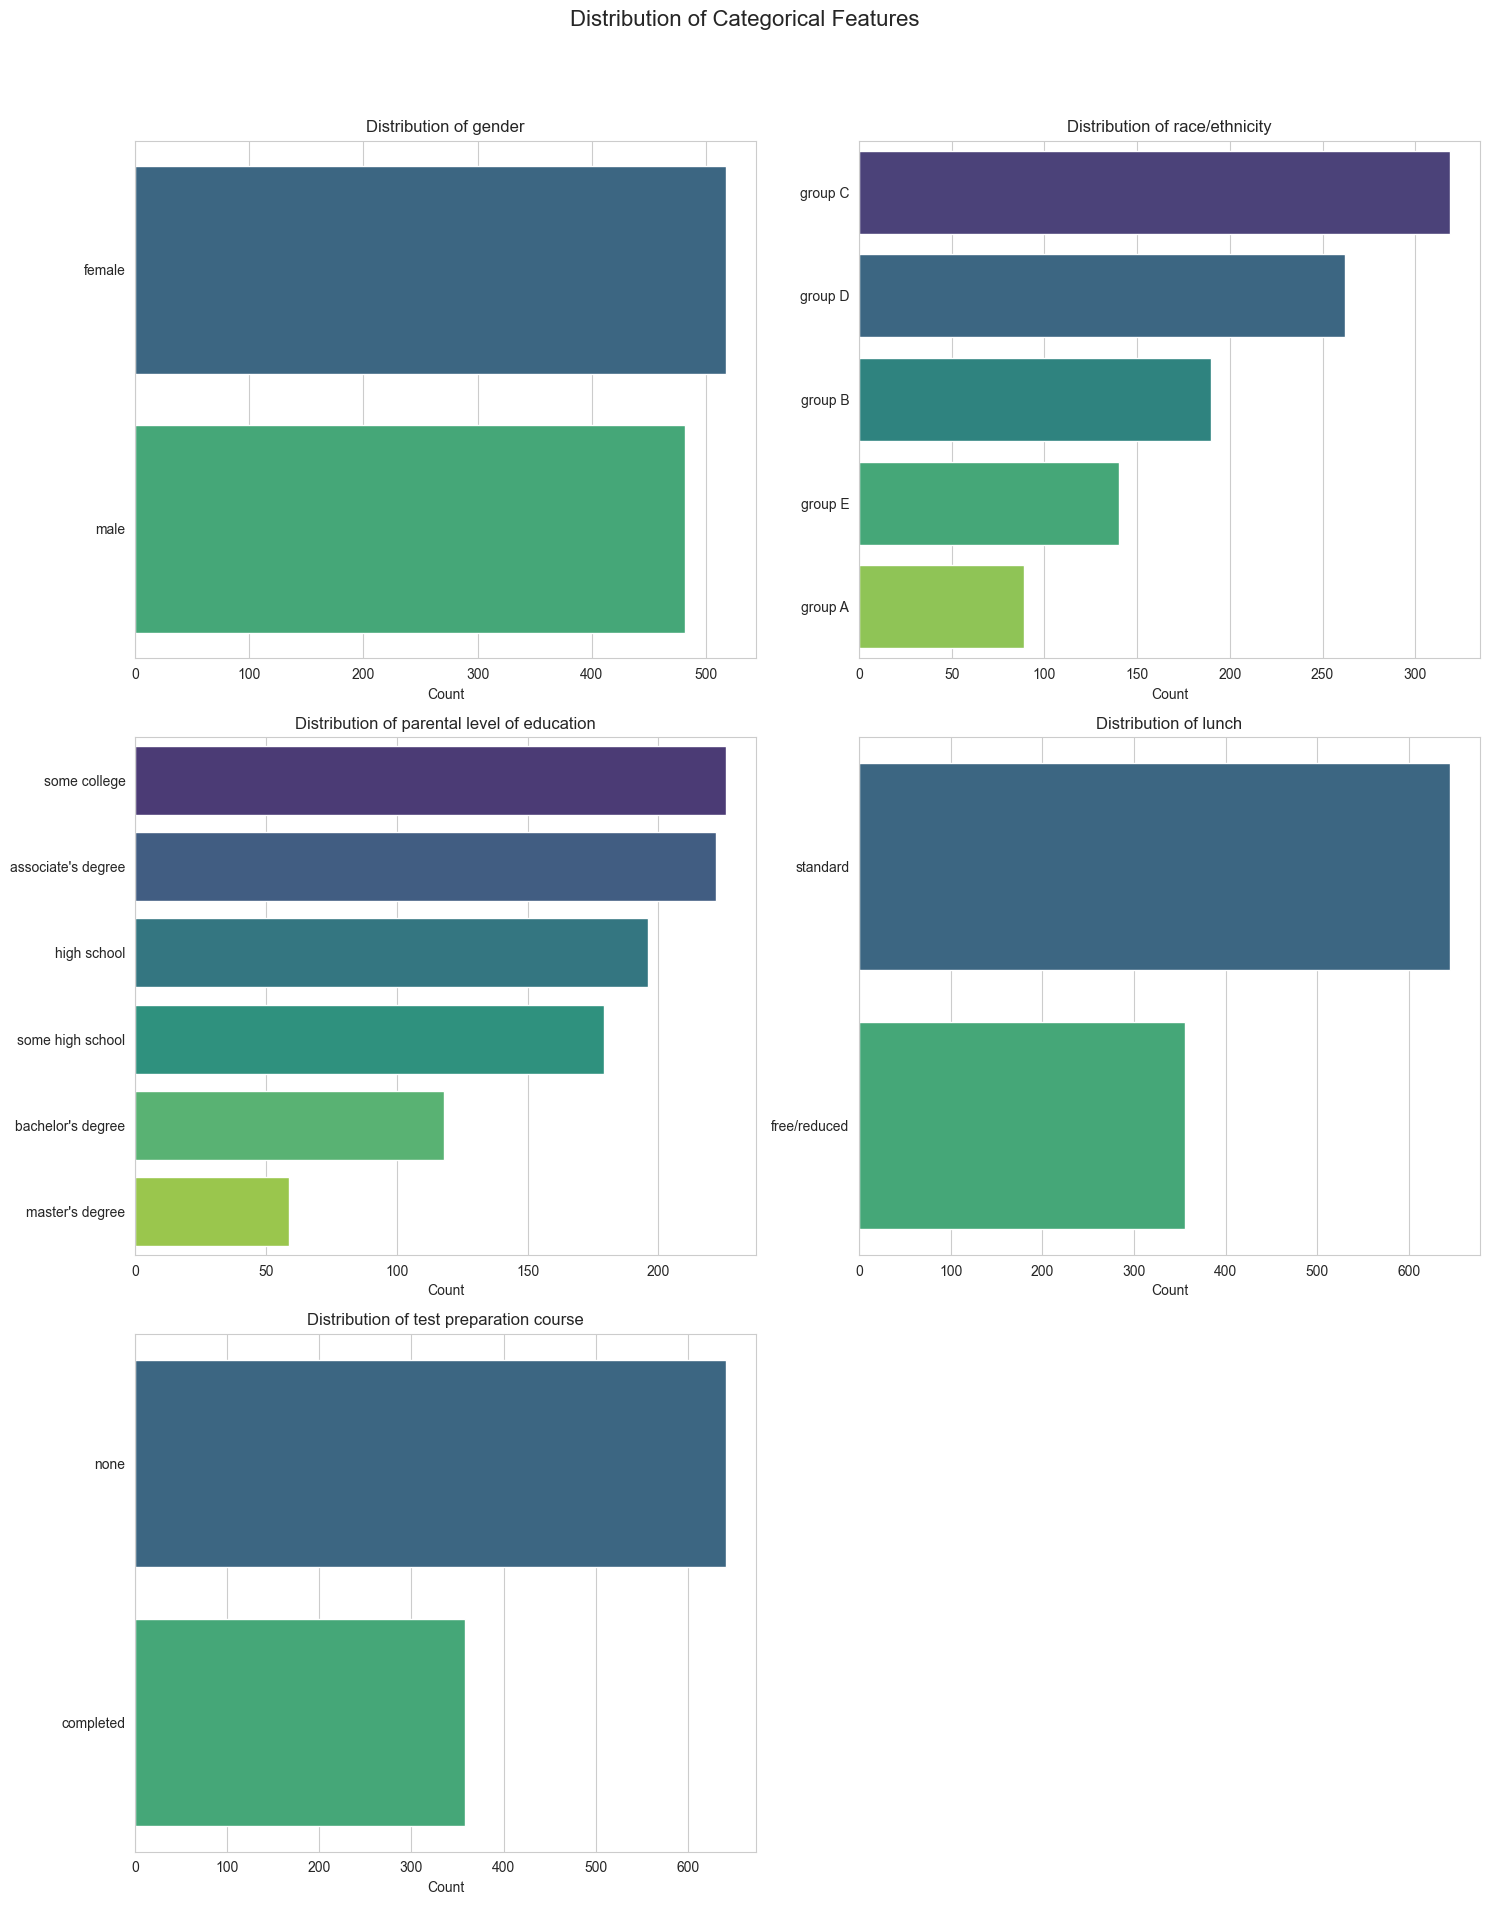

In [6]:
# List of categorical features to plot
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create subplots for categorical feature distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Loop through each categorical feature and create a count plot
for i, col in enumerate(categorical_features):
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index, palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')

# Hide the unused subplot
axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

A key observation from these plots is the class distribution for our classification target, test preparation course. The data shows a notable imbalance: 642 students (64.2%) did not complete the course, while only 358 (35.8%) did. This imbalance likely reflects real-world conditions, where fewer students participate in or complete test preparation programs due to factors such as access, motivation, or resource availability. Such an imbalance can lead to a biased model that tends to favor the majority class ("none"), reducing its ability to correctly identify students who completed the course. To address this issue, resampling techniques (such as SMOTE or random undersampling), class weighting, or evaluation metrics like F1-score and ROC-AUC should be applied during model training to ensure balanced learning and fair performance across both classes.

### 2.3 Bivariate and Multivariate Analysis

#### 2.3.1 Correlation Analysis

A Pearson correlation heatmap is generated to quantify the linear relationships between the numerical features.

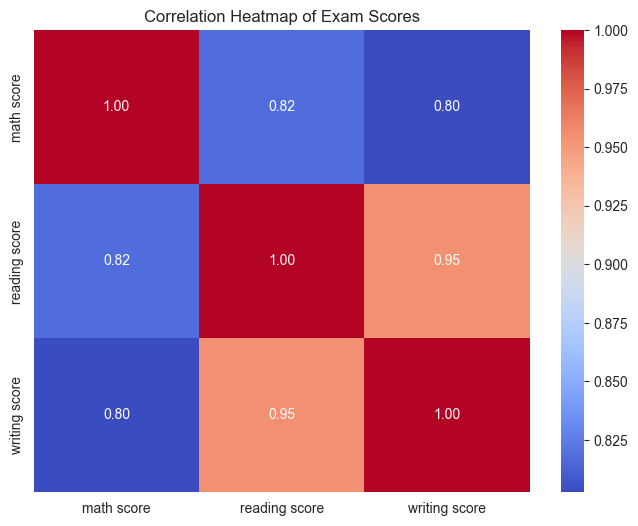

In [7]:
# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Exam Scores')
plt.show()

The heatmap reveals extremely high positive correlations between the three exam scores. The correlation between reading score and writing score is particularly strong ($r = 0.95$), while the correlation between math score and the other two is also very high ($r > 0.80$). This is an expected finding, as students who perform well in one subject are likely to perform well in others.

However, this observation has a critical implication for the regression task: it signals the presence of **severe multicollinearity**. When predictor variables (math score and reading score) are highly correlated, the coefficient estimates in an Ordinary Least Squares (OLS) regression model become unstable and difficult to interpret. Small changes in the data can lead to large fluctuations in the estimated coefficients, and it becomes challenging to isolate the individual effect of each predictor. This EDA finding provides a strong, data-driven justification for the mandatory inclusion of regularized regression models (Ridge, Lasso, and Elastic Net) in our analysis, as these techniques are specifically designed to mitigate the effects of multicollinearity.

#### 2.3.2 Visual Grouped Analysis

Boxplots are used to explore the relationship between categorical features and the numerical writing score. This helps to visualize performance differences across various demographic groups.

C:\Users\nguye\AppData\Local\Temp\ipykernel_11408\46007569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='writing score', y=col, data=df, ax=axes[i], palette='pastel', order=sorted(df[col].unique()))
C:\Users\nguye\AppData\Local\Temp\ipykernel_11408\46007569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='writing score', y=col, data=df, ax=axes[i], palette='pastel', order=sorted(df[col].unique()))
C:\Users\nguye\AppData\Local\Temp\ipykernel_11408\46007569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='writing score'

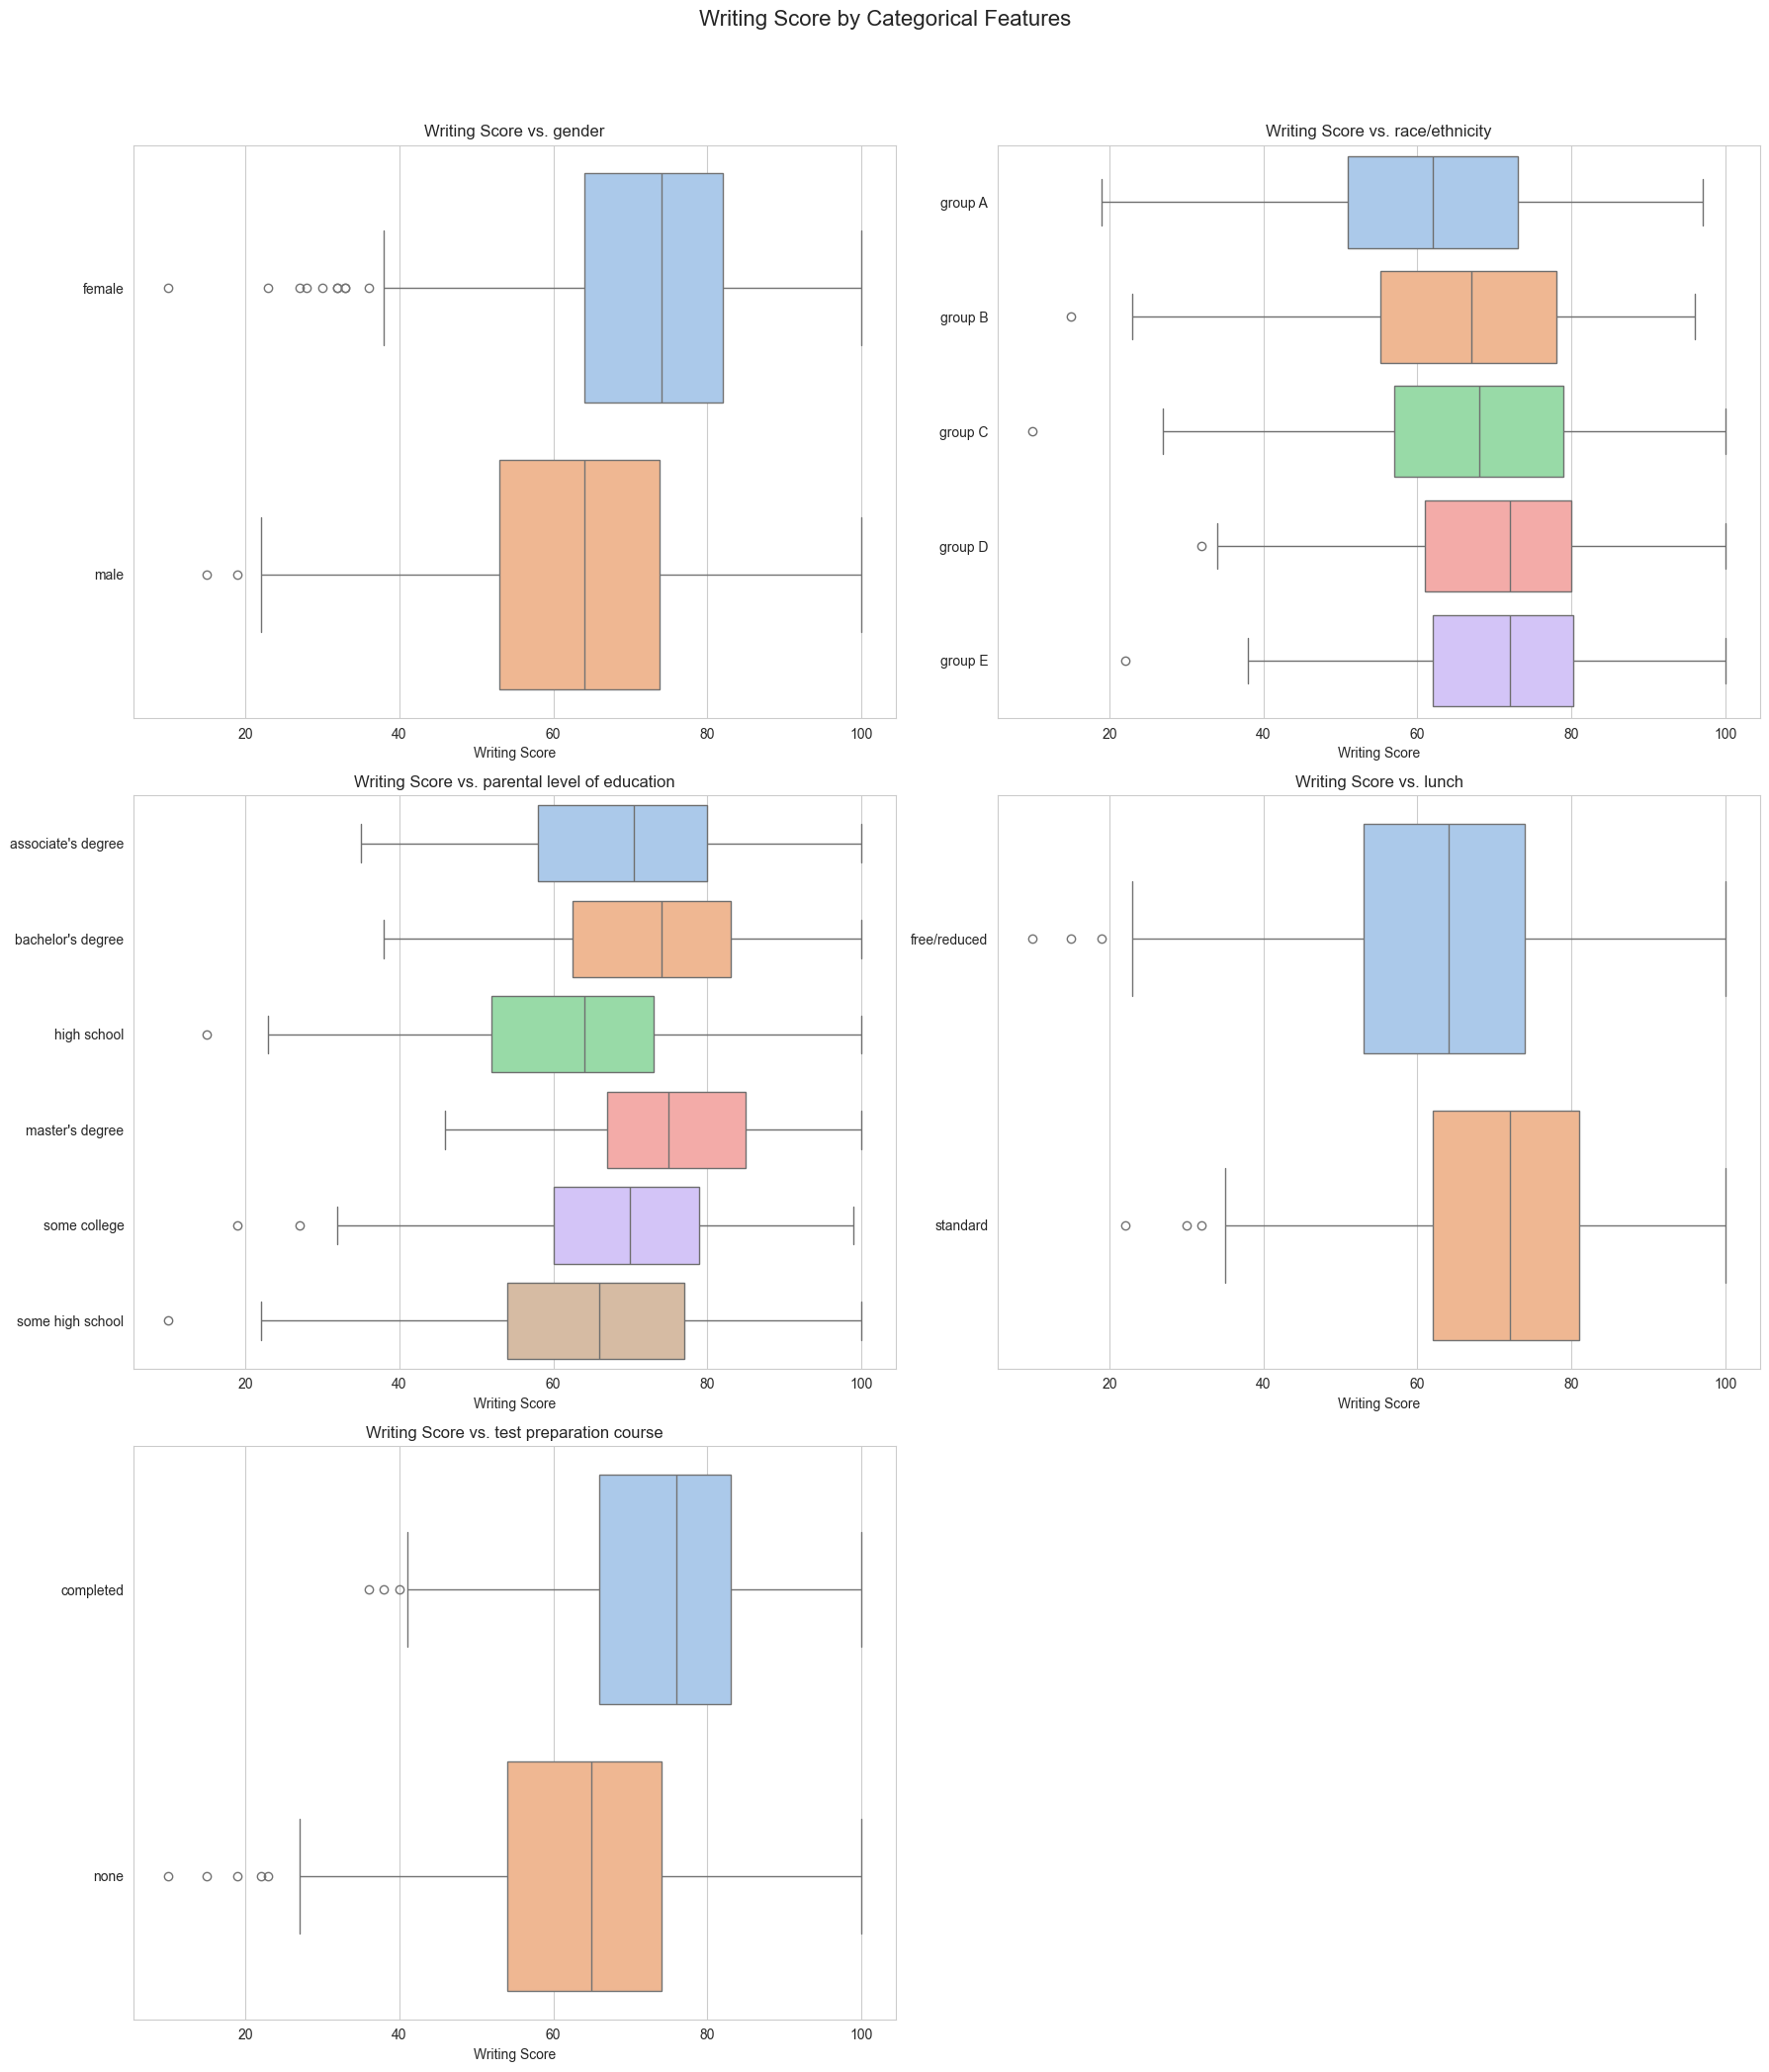

In [8]:
# List of categorical features for grouped analysis
grouped_analysis_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Create subplots for grouped analysis
fig, axes = plt.subplots(3, 2, figsize=(18, 22))
axes = axes.flatten()
fig.suptitle('Writing Score by Categorical Features', fontsize=16)

# Loop through each feature and create a boxplot against writing score
for i, col in enumerate(grouped_analysis_features):
    sns.boxplot(x='writing score', y=col, data=df, ax=axes[i], palette='pastel', order=sorted(df[col].unique()))
    axes[i].set_title(f'Writing Score vs. {col}')
    axes[i].set_xlabel('Writing Score')
    axes[i].set_ylabel('')

# Hide the unused subplot
axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The visualizations confirm several intuitive relationships and uncover significant performance disparities:

- **Test Preparation:** Students who completed the test preparation course consistently achieve higher scores than those who did not.
- **Parental Education:** There is a clear positive trend between the level of parental education and student scores.
- **Socioeconomic Status:** The most striking disparity is related to the lunch feature. Students receiving a standard lunch, which can be interpreted as a proxy for higher socioeconomic status, significantly outperform those receiving a free/reduced lunch (Orogun, 2024). This stark performance gap suggests that socioeconomic factors are strongly associated with academic outcomes in this dataset. This finding raises important questions about equity and fairness that must be considered when interpreting model results and contemplating their real-world deployment. Any predictive model trained on this data will likely learn this association, and its use in an automated decision-making system would require careful ethical scrutiny to avoid penalizing or creating biased outcomes for students from disadvantaged backgrounds.

### 2.4 Summary of Key EDA Insights

- **Clean Data:** The dataset is complete with no missing values.
- **Score Distributions:** Exam scores are approximately normally distributed.
- **Multicollinearity:** The three exam scores are highly correlated, necessitating the use of regularized regression models to ensure stable coefficient estimates.
- **Class Imbalance:** The classification target (test preparation course) is imbalanced, requiring the use of techniques like SMOTE to prevent model bias.
- **Performance Gaps:** Significant performance differences exist based on parental education, completion of a test prep course, and, most notably, lunch type (a proxy for socioeconomic status). This last point highlights a potential source of bias that must be addressed in the final analysis.

## 3. Data Preprocessing and Feature Engineering

This section details the systematic transformation of the raw data into a format suitable for machine learning algorithms. Each step is justified based on the requirements of the models and the insights gained from the EDA.

### 3.1 Categorical Feature Encoding

Machine learning algorithms require numerical input. Therefore, the five categorical features were converted into a numerical format.

#### 3.1.1 Ordinal Encoding

The parental level of education feature has an inherent order. To preserve this ordinal relationship, Ordinal Encoding was applied, mapping the categories to a logical numerical scale.

In [9]:
# Define the explicit order for parental level of education
education_order = [
    'some high school', 'high school', 'some college', 
    "associate's degree", "bachelor's degree", "master's degree"
]

# Create a mapping from the category to an integer
education_map = {level: i for i, level in enumerate(education_order)}

# Apply the mapping to the column
df['parental level of education'] = df['parental level of education'].map(education_map)

#### 3.1.2 One-Hot Encoding

The remaining categorical features (gender, race/ethnicity, lunch, test preparation course) are nominal, meaning they have no intrinsic order. One-Hot Encoding was used to convert these features into a set of binary columns, preventing the models from assuming a false ordinal relationship. The test preparation course column is the target for our classification task, so it is converted into a binary (0/1) format separately.

In [10]:
# Convert the classification target to binary (0 for 'none', 1 for 'completed')
df['test preparation course'] = df['test preparation course'].map({'none': 0, 'completed': 1})

# Apply one-hot encoding to the other nominal features
df = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'lunch'], drop_first=True)

### 3.2 Feature Engineering

To capture a holistic measure of academic performance, a new feature was created.

**average_score:** This feature is the mean of the three exam scores. It serves as a powerful composite indicator of a student's overall academic standing (Orogun, 2024). For the regression task of predicting writing score, this feature will be excluded from the predictors to prevent target leakage. However, it will be a valuable predictor for the classification and a key variable for the clustering task.

In [11]:
# Create the average_score feature
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3

### 3.3 Feature Scaling

Many machine learning algorithms are sensitive to the scale of the input features. To ensure that all features contribute equally to the model's training process, StandardScaler was applied.

**Mathematical Justification:** StandardScaler transforms each feature by subtracting the mean ($\mu$) and dividing by the standard deviation ($\sigma$), resulting in a distribution with a mean of 0 and a standard deviation of 1. The transformation for a feature value $x$ is:

$$z = \frac{x - \mu}{\sigma}$$

This standardization is crucial for algorithms whose objective functions are based on distance calculations (e.g., KNN, SVM, K-Means) or that involve regularization penalties on the magnitude of coefficients (e.g., Ridge, Lasso, Logistic Regression) (Singh et al., 2024). Without scaling, features with larger variances would disproportionately influence these models, leading to suboptimal performance. In contrast, tree-based algorithms like Decision Trees and Random Forests are invariant to monotonic transformations and do not require feature scaling. This theoretical distinction is fundamental and will be revisited in the comparative analysis to explain observed performance differences.

### 3.4 Addressing Class Imbalance for Classification

As identified in the EDA, the test preparation course target variable is imbalanced. A model trained on this data would be biased towards the majority class ('none'). To mitigate this, the Synthetic Minority Over-sampling Technique (SMOTE) was employed.

**Methodology:** SMOTE works by creating synthetic samples of the minority class. It selects a minority class instance at random and finds its k-nearest minority class neighbors. A synthetic instance is then created by choosing one of those neighbors and placing a new point along the line segment joining the two.

**Crucial Implementation Detail:** SMOTE must only be applied to the training data after the train-test split. Applying it to the entire dataset before splitting would cause data leakage, as synthetic samples generated using information from the test set would be present in the training set, leading to an artificially inflated and unreliable evaluation of the model's performance.

The class counts before and after applying SMOTE to the training set demonstrate the rebalancing effect:
- **Before SMOTE:** Class 0: 517, Class 1: 283
- **After SMOTE:** Class 0: 517, Class 1: 517

### 3.5 Data Preprocessing Pipeline Summary

The following table provides a clear, auditable summary of all transformations applied to the data, ensuring the entire preprocessing workflow is transparent and reproducible.

| Original Feature | Data Type | Transformation Applied | Parameters/Details | Justification / Models Affected |
|-----------------|-----------|----------------------|-------------------|--------------------------------|
| gender | object | One-Hot Encoding | drop_first=True | Convert nominal data to numerical format for all models. |
| race/ethnicity | object | One-Hot Encoding | drop_first=True | Convert nominal data to numerical format for all models. |
| parental level of education | object | Ordinal Encoding | Manual mapping based on educational hierarchy. | Preserve the inherent order of the feature for all models. |
| lunch | object | One-Hot Encoding | drop_first=True | Convert nominal data to numerical format for all models. |
| test preparation course | object | Binary Mapping | {'none': 0, 'completed': 1} | Convert classification target to a binary numerical format. |
| math score | int64 | Standardization | StandardScaler (mean=0, std=1) | Scale feature for distance-based and regularized models (KNN, SVM, K-Means, Linear Models). |
| reading score | int64 | Standardization | StandardScaler (mean=0, std=1) | Scale feature for distance-based and regularized models. |
| writing score | int64 | Standardization | StandardScaler (mean=0, std=1) | Scale feature for distance-based and regularized models. Regression target is also scaled. |
| average_score | float64 | Standardization (Engineered) | StandardScaler (mean=0, std=1) | Scale engineered feature for classification and clustering tasks. |
| Target Class Imbalance | N/A | SMOTE | Applied only to training data for classification. | Mitigate bias in classification models by balancing the class distribution. |